In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("C:\\Users\\sivad\\Documents\\INDU_6611_Assignment_2_codes\\dataset.csv")
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Checking for Missing Values

In [5]:
# Missing Values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Encoding features

In [6]:
# Encoding categorical variables

mappings = {
    'school': {'GP': 1, 'MS': 2},
    'sex': {'M': 1, 'F': 2},
    'address': {'R': 1, 'U': 2},
    'famsize': {'GT3': 1, 'LE3': 2},
    'Pstatus': {'A': 1, 'T': 2},
    'Mjob': {'at_home': 1, 'health': 2, 'other': 3, 'services': 4, 'teacher': 5},
    'Fjob': {'at_home': 1, 'health': 2, 'other': 3, 'services': 4, 'teacher': 5},
    'reason': {'course': 1, 'home': 2, 'other': 3, 'reputation': 4},
    'guardian': {'father': 1, 'mother': 2, 'other': 3},
    'schoolsup': {'yes': 1, 'no': 2},
    'famsup': {'yes': 1, 'no': 2},
    'paid': {'yes': 1, 'no': 2},
    'activities': {'yes': 1, 'no': 2},
    'nursery': {'yes': 1, 'no': 2},
    'higher': {'yes': 1, 'no': 2},
    'internet': {'yes': 1, 'no': 2},
    'romantic': {'yes': 1, 'no': 2}
}


for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,2,18,2,1,1,4,4,1,5,...,4,3,4,1,1,3,6,5,6,6
1,1,2,17,2,1,2,1,1,1,3,...,5,3,3,1,1,3,4,5,5,6
2,1,2,15,2,2,2,1,1,1,3,...,4,3,2,2,3,3,10,7,8,10
3,1,2,15,2,1,2,4,2,2,4,...,3,2,2,1,1,5,2,15,14,15
4,1,2,16,2,1,2,3,3,3,3,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df = df.drop (columns = ['G1', 'G2'])
df.shape

(395, 31)

# Chi-square test

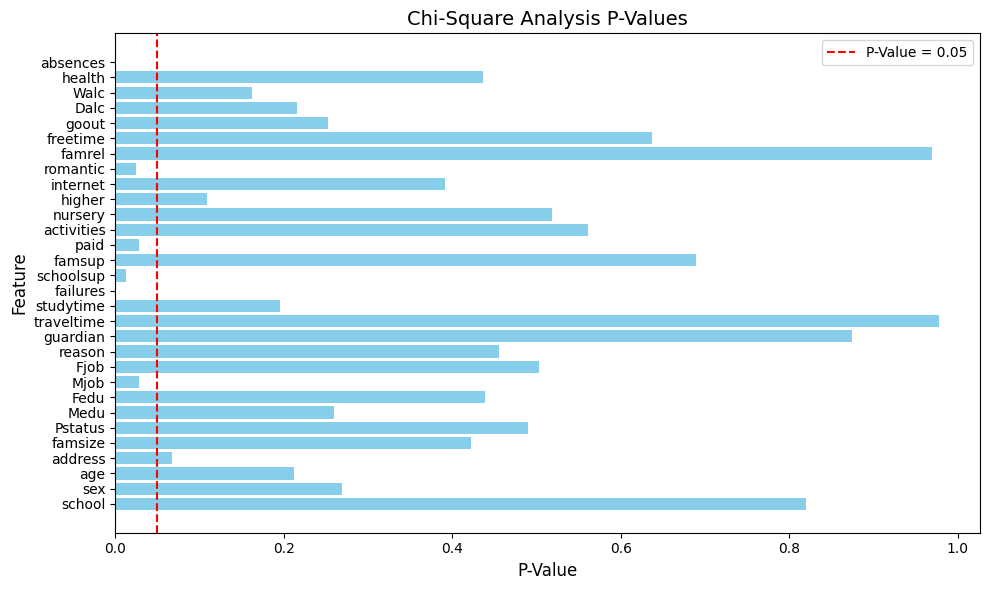

,Feature,Chi-Square,P-Value
29,absences,810.705833,2.222160e-11
14,failures,132.338410,3.756700e-09
15,schoolsup,32.517477,1.296725e-02
22,romantic,30.172482,2.512766e-02
17,paid,29.772479,2.803335e-02
8,Mjob,91.942298,2.821626e-02
3,address,26.375734,6.788170e-02
20,higher,24.380953,1.094483e-01
27,Walc,79.407049,1.623863e-01
13,studytime,59.431632,1.954351e-01


In [15]:
chi2_results = []

# Perform Chi-Square test for each feature in df_selected
for feature in df.columns:
    if feature != 'G3':
        contingency_table = pd.crosstab(df[feature], df['G3'])
        try:
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi2_results.append((feature, chi2, p))
        except ValueError:
            chi2_results.append((feature, None, None))

chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi-Square', 'P-Value'])

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.barh(chi2_df['Feature'], chi2_df['P-Value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='P-Value = 0.05')
plt.xlabel('P-Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Chi-Square Analysis P-Values', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

chi2_df_sorted = chi2_df.sort_values(by='P-Value', ascending=True)
chi2_df_sorted


# Feature Selection

In [9]:
selected_features_chi = ['failures', 'Mjob', 'romantic', 'absences', 'paid', 'address', 'schoolsup', 'higher', 'Walc', 'studytime', 'age', 'Dalc']

# Creating a new DataFrame with the selected features
selected_features_chi = df[selected_features_chi + ['G3']]

# Display the new dataframe
selected_features_chi.head()


,failures,Mjob,romantic,absences,paid,address,schoolsup,higher,Walc,studytime,age,Dalc,G3
0,0,1,2,6,2,2,1,1,1,2,18,1,6
1,0,1,2,4,2,2,2,1,1,2,17,1,6
2,3,1,2,10,1,2,1,1,3,2,15,2,10
3,0,2,1,2,1,2,2,1,1,3,15,1,15
4,0,3,2,4,1,2,2,1,2,2,16,1,10


# Check for Multicollinearity

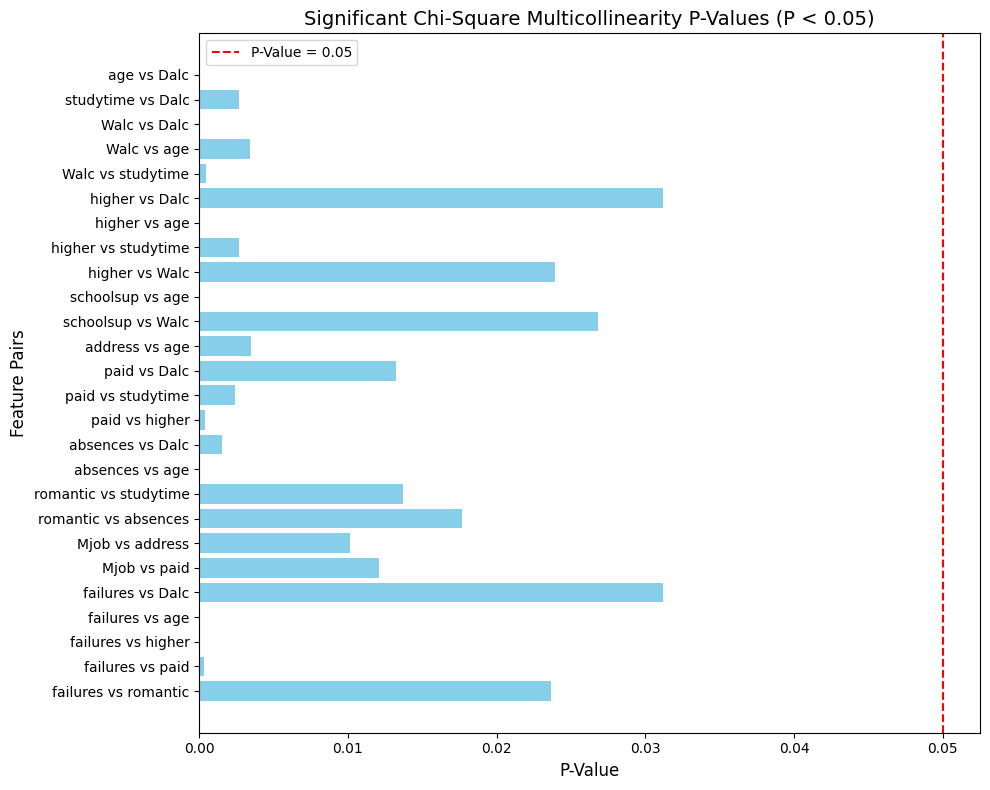

,Feature 1,Feature 2,Chi-Square,P-Value
62,Walc,Dalc,287.001910,1.245772e-51
9,failures,age,144.299039,2.113708e-20
6,failures,higher,45.210149,8.348431e-10
65,age,Dalc,81.447427,4.055201e-07
36,absences,age,337.979897,5.494895e-06
58,higher,age,33.284302,2.343497e-05
54,schoolsup,age,30.892707,6.507147e-05
3,failures,paid,18.537218,3.407452e-04
40,paid,higher,12.462690,4.151617e-04
60,Walc,studytime,34.901977,4.854397e-04


In [10]:
chi2_multicollinearity_results = []

features = selected_features_chi.columns.drop('G3')
for i, feature_1 in enumerate(features):
    for feature_2 in features[i + 1:]:
        contingency_table = pd.crosstab(selected_features_chi[feature_1], selected_features_chi[feature_2])
        try:
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi2_multicollinearity_results.append((feature_1, feature_2, chi2, p))
        except ValueError:
            chi2_multicollinearity_results.append((feature_1, feature_2, None, None))

chi2_multicollinearity_df = pd.DataFrame(chi2_multicollinearity_results, columns=['Feature 1', 'Feature 2', 'Chi-Square', 'P-Value'])

# Filter the significant feature pairs where P-Value < 0.05
significant_pairs = chi2_multicollinearity_df[chi2_multicollinearity_df['P-Value'] < 0.05]

# Plot only the significant pairs
plt.figure(figsize=(10, 8))
plt.barh(significant_pairs['Feature 1'] + " vs " + significant_pairs['Feature 2'], 
         significant_pairs['P-Value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='P-Value = 0.05')
plt.xlabel('P-Value', fontsize=12)
plt.ylabel('Feature Pairs', fontsize=12)
plt.title('Significant Chi-Square Multicollinearity P-Values (P < 0.05)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

significant_pairs_sorted = significant_pairs.sort_values(by='P-Value', ascending=True)
significant_pairs_sorted

# Model parameters

In [11]:
# Features and Target
X = selected_features_chi.drop(columns=['G3']) 
y = selected_features_chi['G3'] 

# Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Random Forest Regressor

In [12]:
# Train Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_regressor.fit(X_train, y_train)

# Predictions
y_pred = random_forest_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5.810621047090404
R-squared (R2): 0.8062767606064716


# Decision Tree Regressor

In [13]:
# Train Decision Tree Regressor model
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)

# Predictions
y_pred = decision_tree_regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 8.301320132013203
R-squared (R2): 0.7232380817500436


# Random Forest Model

In [14]:
# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report)

Confusion Matrix:
[[12  0  0  0  0  0  0  1  0  1  0  0  1  0  0  0  0  1]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  2  0  0 11  2  1  2  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  2  8  3  3  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  1  0  1  3  2  1  1  2  2  1  2  1  0  0  0]
 [ 0  0  0  0  0  2  0  2  4  0  1  2  1  0  0  1  0  0]
 [ 1  0  0  2  0  0  0  1  1  6  3  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 15  0  0  0  0  0  0]
 [ 3  0  0  2  0  0  0  1  1  2  0  0  8  3  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24  0]
 [ 0  0  0  0